# Load libraries

In [55]:
import numpy as np
import pandas as pd

# Machine learning
#from sklearn import 

# Graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [64]:
DF_trn = pd.read_csv("Data/train.csv")
DF_tst = pd.read_csv("Data/test.csv")

# Combine test and training data, for the purpose of manipulating features in both simultaneously
DF = pd.concat([DF_trn, DF_tst], axis=0, ignore_index=True)

# Get length of training and test test, and create variables to index each subset
n_trn = len(DF_trn); n_tst = len(DF_tst)
trn = np.arange(n_trn)
tst = np.arange(n_trn, n_trn+n_tst)


DF.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


# First look
Plot distribution of prices

Range for year of sale: 2006 - 2010
Range for sale prices: 34900.0 - 755000.0


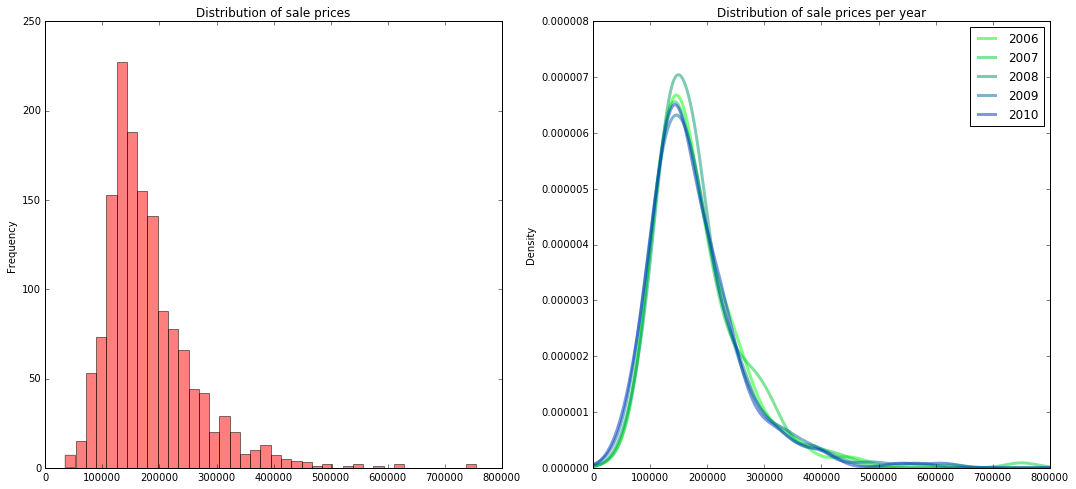

In [143]:
year_range = [DF.loc[trn,'YrSold'].min(), DF.loc[trn,'YrSold'].max()] 
print("Range for year of sale: " + str(year_range[0]) + " - " + str(year_range[1]))
print("Range for sale prices: " + str(DF.loc[trn,'SalePrice'].min()) + " - " + str(DF.loc[trn,'SalePrice'].max()))


fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))

DF.loc[trn,'SalePrice'].plot(kind='hist', color='red', label='Sale Price', bins=40, alpha=0.5)    
plt.title("Distribution of sale prices")

ax2 = plt.subplot2grid((1,2),(0,1))

SalePrices_year = [[] for x in range(year_range[0],year_range[1]+1)]
for year in range(year_range[0],year_range[1]+1):
    idx = np.array(DF.loc[trn,'YrSold']==year)
    SalePrices_year[year-year_range[0]] = DF.loc[idx,'SalePrice']
    SalePrices_year[year-year_range[0]].plot(kind='kde', color=[0,1-(year-2006)/5,(year-2006)/5], label=year, alpha=0.5, lw=3)

plt.title("Distribution of sale prices per year")
plt.xlim(0,800000)
plt.legend()

The shape of the distribution looks reasonably consistent over the years, but the location of the peak does seem to vary. Another plot to provide more information:

{'boxes': [<matplotlib.lines.Line2D at 0x75937bb38>,
 'caps': [<matplotlib.lines.Line2D at 0x759383eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x75938ee80>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x759388f28>,
 'whiskers': [<matplotlib.lines.Line2D at 0x75937bcf8>,
  <matplotlib.lines.Line2D at 0x759ab4be0>]}

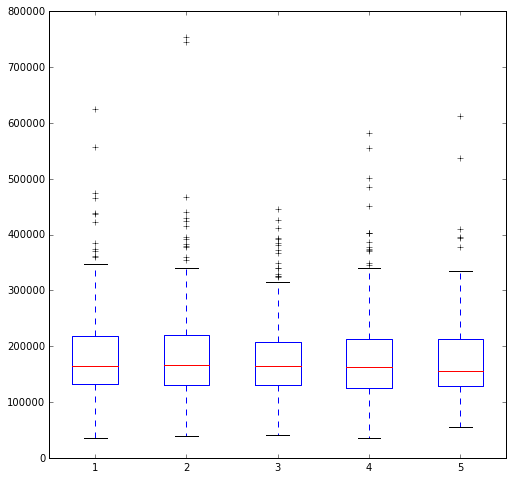

In [144]:
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))



plt.boxplot(SalePrices_year)

# Benchmark: GLM on year built, year sold

TypeError: 'list' object cannot be interpreted as an integer

# Missing values, Imputation

In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291